# TEMPLATE 

Binary Classifiers : perceptron and logistic regression
1. 2D Toy Data. Training the models
2. Visualization of the Feature Space (visual evaluation of the models).



In [146]:
#numeric: pandas and numpy
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

In [147]:
#Toy examples illustration. Verify if package "mlxten"
from mlxtend.plotting import plot_decision_regions


# Toy Data

Starting with toy data to understand the main characteristics of the models. 
1. Creating artificial data with two characteristics 
    might be useful.

Scikit- learn provides also data sets with real data and all of them are avalaible and easily download and written in the proper formats 

https://scikit-learn.org/stable/datasets/index.html

In [148]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_circles

X_blobs, y_blobs = make_blobs(n_samples=100, centers=2, n_features=2, random_state=None)

X_moon,y_moon= make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

X_cir, y_cir= make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.4)

In [149]:
print(np.unique(y_blobs))

[0 1]


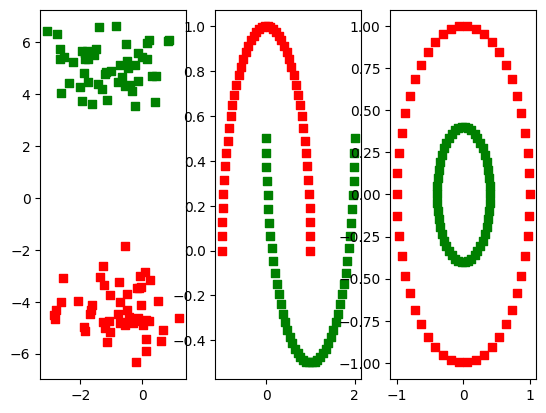

In [150]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.scatter(X_blobs[y_blobs==0,0],X_blobs[y_blobs==0,1],marker='s',color='r',label='0' )
ax1.scatter(X_blobs[y_blobs==1,0],X_blobs[y_blobs==1,1],marker='s',color='g',label='0' )
#ax1.set_aspect('equal')
ax2.scatter(X_moon[y_moon==0,0],X_moon[y_moon==0,1],marker='s',color='r',label='0' )
ax2.scatter(X_moon[y_moon==1,0],X_moon[y_moon==1,1],marker='s',color='g',label='0' )

ax3.scatter(X_cir[y_cir==0,0],X_cir[y_cir==0,1],marker='s',color='r',label='0' )
ax3.scatter(X_cir[y_cir==1,0],X_cir[y_cir==1,1],marker='s',color='g',label='0' )


# Learning 

There are two steps 
1.  The creation of the  classifier.  Comprises the assignment of the parameters of the training algorithm (called hyper-parameters) which have influence on the performance of the classifier.
2. The training phase. Which  is the adaption of the model parameters using a training set.

After learning there is the test phase.  To measure the performance on unseen data, e.g,  data not included in the  traning set. The test set 


### Learning with linear discriminant classifiers 

In [151]:
# The Data set
X=X_blobs
y=y_blobs
X1=X_moon
y1=y_moon

In [152]:
from sklearn.linear_model import Perceptron
#Create perceptron and assign hyperparameters (max_iter, eta0- learning rate)
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

#Learning
ppn.fit(X,y)
ppn.fit(X1,y1)



Perceptron(eta0=0.1, max_iter=20, n_jobs=1, tol=None)

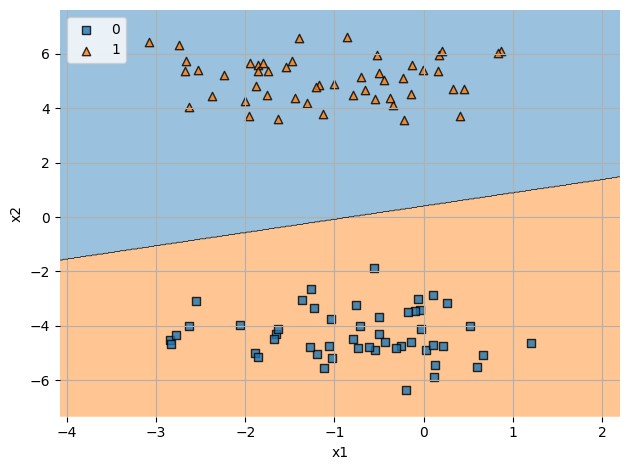

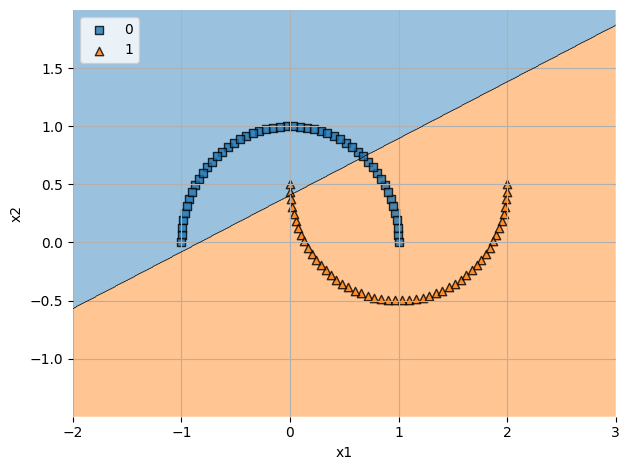

In [153]:
plot_decision_regions(X, y, clf=ppn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

plot_decision_regions(X1, y1, clf=ppn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [154]:
print('number of iteration', ppn.n_iter_)
print('weights', ppn.coef_)
print('bias',ppn.intercept_)

number of iteration 20
weights [[ 0.12005971 -0.24633219]]
bias [0.1]


## Gradient based algorithms
### ADALINE, logistic regression. 

See  details on: https://scikit-learn.org/stable/modules/sgd.html

In [155]:
from sklearn.linear_model import SGDClassifier
# With loss="log" a logistic regression is be appllied.  with loss="squared_loss" is least squares.

gd=SGDClassifier(loss="log", max_iter=20)

gd


SGDClassifier(loss='log', max_iter=20)

C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


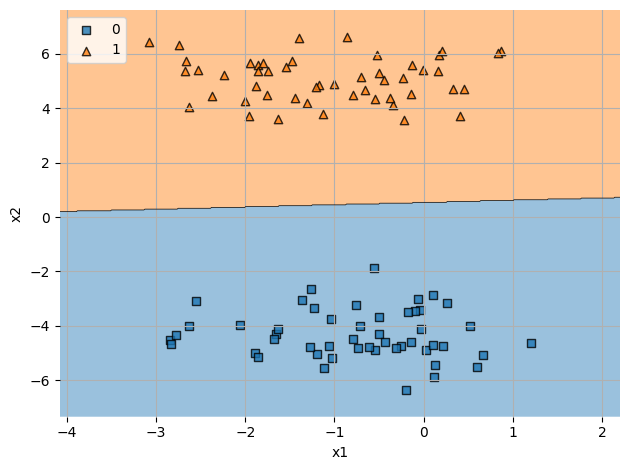

C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\TiagoC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


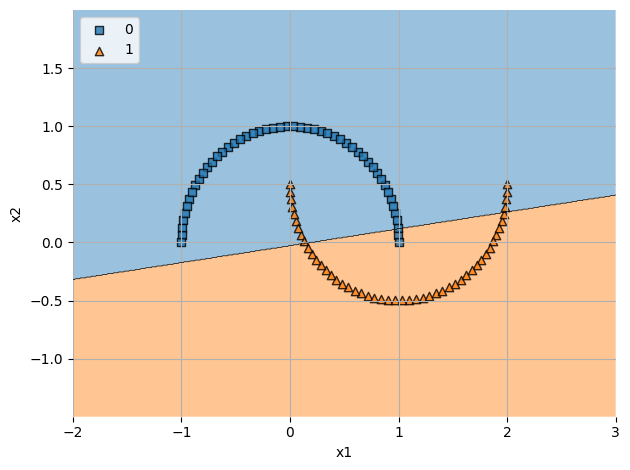

In [156]:
# fit
gd=gd.fit(X,y)
# how it learns
plot_decision_regions(X, y, clf=gd)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

gd=gd.fit(X1,y1)
# how it learns
plot_decision_regions(X1, y1, clf=gd)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


number of iteration 20
weights [[  1.9401713  -13.36585409]]
bias [-0.37915723]


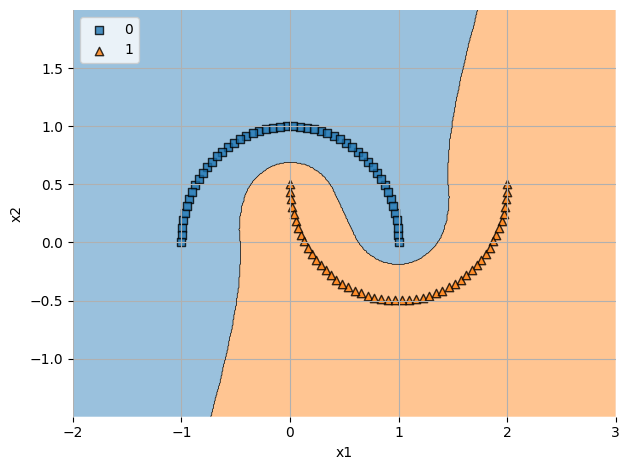

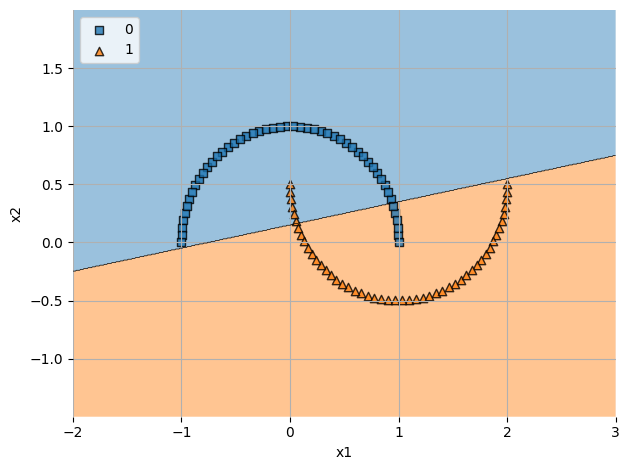

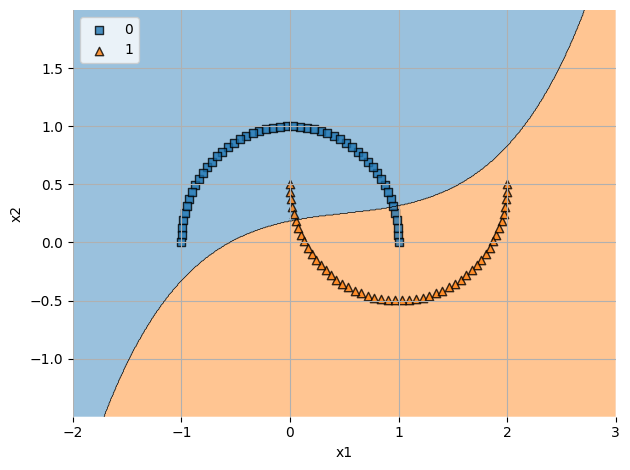

In [157]:
#Parameters
print('number of iteration', gd.n_iter_)
print('weights', gd.coef_)
print('bias',gd.intercept_)

#use knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn=knn.fit(X1,y1)
plot_decision_regions(X1, y1, clf=knn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

#use logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000.0, random_state=0)
lr=lr.fit(X1,y1)
plot_decision_regions(X1, y1, clf=lr)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

#use SVM
from sklearn.svm import SVC
svm=SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm=svm.fit(X1,y1)
plot_decision_regions(X1, y1, clf=svm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()



## Question:
1. Calculate the equation of the decision boundary
2. The model learns all the training data?

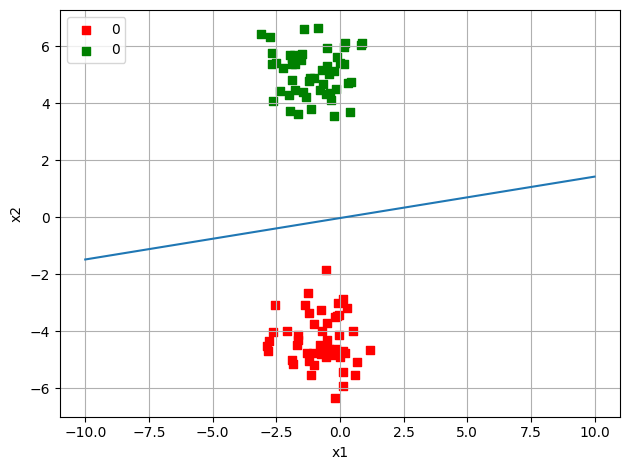

number of misclassified samples 100


In [158]:
#Calculate the equation of the decision boundary using the weights and bias
weights=gd.coef_
bias=gd.intercept_
x1=np.linspace(-10,10,100)
x2=-(weights[0,0]*x1+bias)/weights[0,1]
plt.plot(x1,x2)
plt.scatter(X[y==0,0],X[y==0,1],marker='s',color='r',label='0' )
plt.scatter(X[y==1,0],X[y==1,1],marker='s',color='g',label='0' )
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# The model learns all the training data?
print('number of misclassified samples', (y!=gd.predict(X)).sum())
#R: Yes, all the training data is classified correctly


